# Practica Final Machine Learning

## INTRODUCCIÓN

Nuestro objetivo en esta práctica será mediante técnicas de aprendizaje supervisado crear un evaluador automático de precios de alojamientos.
Para ello precisamos de una base de datos de la empresa Airbnb, que nos muestra diferentes características sobre los estos pisos.


## ANÁLISIS DEL DATASET

Vamos a observar como está compuesto nuestro dataset.
Antes de todo necesitamos importar las primeras librerías que vamos a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Airbnb_listings_extract_2.csv",sep=",",low_memory=False)
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,2.017030e+13,07.03.17,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,2.017040e+13,08.04.17,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza CataluÃ±a Catalonia Square is the larg...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,2.017040e+13,08.04.17,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza CataluÃ±a Catalonia Square is the larg...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,2.017040e+13,08.04.17,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,2.017040e+13,08.04.17,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


In [3]:
pd.options.display.max_rows = 89

In [4]:
data.shape

(14780, 89)

Podemos observar que disponemos de 89 variables que nos aportan características relevantes a los pisos.
También contamos con 14780 observaciones.
Vamos a observar la estadística descriptiva de nuestras características:

In [5]:
data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14725.000000,14755.000000,14731.00000,...,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,3.277808,1.281732,1.343816,2.04426,...,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.668377e+08,3.425360e+07,15.215988,34.090223,34.090223,2.097291,0.658517,0.900078,1.61277,...,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017040e+13,6.787360e+06,100.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017040e+13,2.464875e+07,100.000000,2.000000,2.000000,3.000000,1.000000,1.000000,2.00000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017040e+13,5.432919e+07,100.000000,6.000000,6.000000,4.000000,1.000000,2.000000,2.00000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017060e+13,1.247534e+08,100.000000,519.000000,519.000000,16.000000,8.000000,10.000000,16.00000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


Observamos que nuestras variables están en diferentes escalas, por lo que más tarde será necesario escalar y normalizar nuestros datos para que no se preduzcan anomalías en nuestros modelos predictivos.

Vamos a analizar y conocer mejor estas variables:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  float64
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

Podemos observar los diferentes tipos de cada variable, donde contamos tanto con variables continuas como categóricas, que posteriormente serán necesario tratarlas.
También vemos que un gran número de variables cuentan con valores missings, que también tendremos analizar para que nuestro estudio sea más preciso.
Nuestro objetivo es intentar predecir el precio de los alojamientos, por lo que es imprescindible ver como estará distribuida nuestra variable objetivo, en nuestro caso es 'Price'.

### DISTRIBUCIÓN VARIABLE OBJEIVO 'PRICE'

Vamos a observar diferentes parámetros descriptivos de nuestra variable:

In [7]:
data['Price'].describe()

count    14763.000000
mean        73.561471
std         72.062050
min          9.000000
25%         34.000000
50%         55.000000
75%         86.000000
max        999.000000
Name: Price, dtype: float64

Vemos que la media es 73€, aunque el mínimo es 9€ y el máximos es 999€

In [8]:
print(data['Price'].median())
print(data['Price'].mode())

55.0
0    50.0
Name: Price, dtype: float64


Vamos a observar los diferentes valores que toma nuestra variable objetivo:

In [9]:
porcentaje_price=data['Price'].value_counts(normalize=True).mul(100).rename('porcentaje').reset_index()
contar_price = data['Price'].value_counts().reset_index()
dist_price = pd.merge(porcentaje_price, contar_price, on=['index'], how='inner')
dist_price

,index,porcentaje,Price
0,50.0,4.443541,656
1,60.0,3.901646,576
2,25.0,3.711983,548
3,30.0,3.684888,544
4,35.0,3.237824,478
...,...,...,...
365,612.0,0.006774,1
366,239.0,0.006774,1
367,577.0,0.006774,1
368,875.0,0.006774,1


Podemos ver los valores de los precios y el porcentaje de veces que aparece en nuestro dataset.
Vamos a ver gráficamente la densidad de los valores de la variable con un histograma

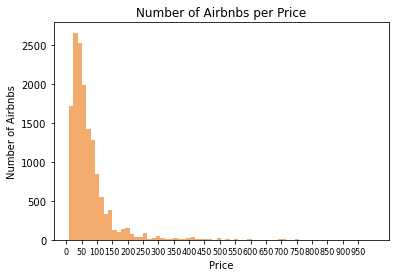

In [15]:
plt.hist(data.Price, bins=70, color='#F2AB6D')
plt.xticks(np.arange(0, np.max(data.Price),50), fontsize=8)
plt.xlabel("Price")
plt.ylabel("Number of Airbnbs")
plt.title("Number of Airbnbs per Price")
plt.show()

Vemos que la mayor parte de los precios se encuentran alrededor de 50€. También hay otros alojamientos, seguramente con mayores prestaciones, con precios muchos más alto. Será interesante en nuestro estudio observar que características están más relacionadas con precios altos, así también con los precios bajos.

## PREPROCESSING

Una vez ya visto nuestro dataset y habiendo fijado nuestros objetivos, para enriquecer el estudio y que sea mucho más preciso se va a tratar los datos de los que disponemos, para tener un dataset limpio y ordenado, entendiendo mucho mejor cómo afectan las características al precio y cuáles son las más óptimas para realizar los modelos.

Lo primero que se va a hacer es eliminar la variable 'ID'  ya que es una forma distinta de denotar lo mismo, en este caso el alojamiento concreto, y ya disponemos de esa información con la observación.

In [17]:
data = data.drop(['ID'], axis=1)

De la misma forma se va a eliminar la variable 'Host Name' ya que ya se tiene una manera de identificar el host que es con su id, además de qué el nombre del dueño no influirá en el precio del piso.

In [18]:
data = data.drop(['Host Name'], axis=1)

A continuación se va a eliminar todas las variable tipo 'Url', ya que no aportan información (aunque podría resultar interesante realizar algún estudio sobre el contenido de estos links e implementarlo al trabajo) y solo entorpecerán el objetivo. 
Primero se muestran cuáles son:

In [19]:
url= [s for s in data if "Url"  in s]
url=list(url)
print(url)

['Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host Thumbnail Url', 'Host Picture Url']


In [20]:
URL=[s for s in data if "URL"  in s]
URL=list(URL)
print(URL)

['Host URL']


Quitamos estas variables de nuestro dataset

In [21]:
data_new_1=data.drop(columns=url)
data_new_1=data_new_1.drop(columns=URL)
data_new_1.shape

(14780, 79)

También se van a eliminar todas aquellas variables que sean párrafos, ya que entorpecen el estudio, y esa información esta recogida dentro de otras variables.
También se pondrá un ejemplo gráfico para ver si alguna de estas variables afecta realmente al precio.

In [22]:
data_new_1=data_new_1.drop(columns=['Name','Description','Summary','Space','Neighborhood Overview','Notes','Transit','Access',
                          'Interaction','House Rules','Host About','Host Neighbourhood',
                            'Street','Neighbourhood','Amenities','State','Market',
                            'Country','Jurisdiction Names'], axis=1)
data_new_1.shape

(14780, 60)

### MISSINGS

Será muy necesario tratar los valores missings de las variables. 

Con el siguiente código se va a ver el porcentaje de missings que tienen las variables:

In [24]:
df_nulos_col =data_new_1.isnull().sum()
pd_series_null_rows = data_new_1.isnull().sum(axis=1).sort_values(ascending=False)
pd_null_columnas=pd.DataFrame(df_nulos_col, columns=['nulos_columnas'])
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/data_new_1.shape[0]
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas'])
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/data_new_1.shape[1]

In [25]:
pd_null_columnas

,nulos_columnas,porcentaje_columnas
Scrape ID,0,0.000000
Last Scraped,0,0.000000
Experiences Offered,0,0.000000
Host ID,0,0.000000
Host Since,3,0.000203
Host Location,43,0.002909
Host Response Time,1899,0.128484
Host Response Rate,1899,0.128484
Host Acceptance Rate,14741,0.997361
Host Listings Count,3,0.000203


Se hace lo mismo por filas, es decir vamos a ver el porcentaje de missings que tiene cada observación:

In [26]:
pd_null_filas

,nulos_filas,porcentaje_filas
8891,24,0.400000
14255,24,0.400000
10313,23,0.383333
94,23,0.383333
3317,23,0.383333
...,...,...
4556,2,0.033333
2135,2,0.033333
4978,2,0.033333
6932,2,0.033333


A continuación se va a eliminar del dataset todas aquellas variables con un porcentaje mayor o igual al 70% de valores missings, ya que serán variables de la que apenas podremos sacar información valiosa y solo entorpecerán el estudio.


In [27]:
threshold=0.7
list_vars_not_null = list(pd_null_columnas[pd_null_columnas['porcentaje_columnas']<threshold].index)
df_filter_null = data_new_1.loc[:, list_vars_not_null]
df_filter_null.shape

(14780, 54)

Se renombra el dataset y se muestra como ha quedado:

In [28]:
df1= df_filter_null
df1.head()

,Scrape ID,Last Scraped,Experiences Offered,Host ID,Host Since,Host Location,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,...,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,2.017030e+13,07.03.17,none,58386783,11.02.16,My father was USAF so I was born at Offutt AFB...,within an hour,100.0,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,2.017040e+13,08.04.17,none,102947901,08.11.16,"Barcelona, Catalonia, Spain",within an hour,100.0,162.0,162.0,...,10.0,10.0,10.0,8.0,10.0,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,2.017040e+13,08.04.17,none,102947901,08.11.16,"Barcelona, Catalonia, Spain",within an hour,100.0,162.0,162.0,...,NaN,NaN,NaN,NaN,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,2.017040e+13,08.04.17,none,131794,25.05.10,"Barcelona, CataluÃ±a, Spain",within an hour,100.0,27.0,27.0,...,9.0,10.0,10.0,10.0,9.0,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,2.017040e+13,08.04.17,none,54310958,12.01.16,"Madrid, Community of Madrid, Spain",within an hour,99.0,207.0,207.0,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


Por filas se ve que no se tiene ninguna observación relevante que eliminar

In [29]:
index_null_filas = np.where(pd_null_filas['porcentaje_filas']>= 0.6)[0]
index_null_filas = list(index_null_filas)
print(index_null_filas)

[]


Ahora se van a dividr las variables en categóricas y numéricas para despues tratarlas por separado.

In [30]:
df1.dtypes

Scrape ID                         float64
Last Scraped                       object
Experiences Offered                object
Host ID                             int64
Host Since                         object
Host Location                      object
Host Response Time                 object
Host Response Rate                float64
Host Listings Count               float64
Host Total Listings Count         float64
Host Verifications                 object
Neighbourhood Cleansed             object
Neighbourhood Group Cleansed       object
City                               object
Zipcode                            object
Smart Location                     object
Country Code                       object
Latitude                           object
Longitude                          object
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          

In [31]:
Var_discretas=list(df1.select_dtypes('object').columns) #Lista de variables categóricas
Var_discretas

['Last Scraped',
 'Experiences Offered',
 'Host Since',
 'Host Location',
 'Host Response Time',
 'Host Verifications',
 'Neighbourhood Cleansed',
 'Neighbourhood Group Cleansed',
 'City',
 'Zipcode',
 'Smart Location',
 'Country Code',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Calendar Updated',
 'Calendar last Scraped',
 'First Review',
 'Last Review',
 'Cancellation Policy',
 'Geolocation',
 'Features']

In [32]:
Var_continuas=list(df1.select_dtypes(np.number).columns) #Lista variables continuas
Var_continuas

['Scrape ID',
 'Host ID',
 'Host Response Rate',
 'Host Listings Count',
 'Host Total Listings Count',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Availability 30',
 'Availability 60',
 'Availability 90',
 'Availability 365',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Calculated host listings count',
 'Reviews per Month']

Para las variables categóricas se van a sustituir los valores nulos por la moda. 
Para las variables numéricas se van a sustituir los valores nulos por la mediana.


In [33]:
df1[Var_discretas]=df1[Var_discretas].fillna(df1[Var_discretas].mode())
df1[Var_continuas]=df1[Var_continuas].fillna(df1[Var_continuas].median())

Se va a observar si se han reemplazado todos los missings.

In [35]:
df1.isnull().sum()

Scrape ID                            0
Last Scraped                         0
Experiences Offered                  0
Host ID                              0
Host Since                           3
Host Location                       43
Host Response Time                1899
Host Response Rate                   0
Host Listings Count                  0
Host Total Listings Count            0
Host Verifications                   6
Neighbourhood Cleansed               0
Neighbourhood Group Cleansed      1019
City                                 6
Zipcode                            506
Smart Location                       0
Country Code                         0
Latitude                             0
Longitude                            0
Property Type                        0
Room Type                            0
Accommodates                         0
Bathrooms                            0
Bedrooms                             0
Beds                                 0
Bed Type                 

Se puede observar que hay variables que aún contienen missings, todas ellas categóricas, así que se seleccionan estas variables y se imputan los missings denotándolos para identificar que no tienen valor, será útil ya que posteriormente se transformarán estas variables categóricas.


In [36]:
columnas =list(df1.columns)
index = list(np.where(df1[columnas].isnull().sum() !=0)[0])
col_missing = df1.columns[index]
col_missing

Index(['Host Since', 'Host Location', 'Host Response Time',
       'Host Verifications', 'Neighbourhood Group Cleansed', 'City', 'Zipcode',
       'First Review', 'Last Review', 'Features'],
      dtype='object')

Se reemplazan los missings

In [37]:
df1[col_missing] = df1[col_missing].fillna('Sin Valor')

In [38]:
df1.isnull().sum()

Scrape ID                         0
Last Scraped                      0
Experiences Offered               0
Host ID                           0
Host Since                        0
Host Location                     0
Host Response Time                0
Host Response Rate                0
Host Listings Count               0
Host Total Listings Count         0
Host Verifications                0
Neighbourhood Cleansed            0
Neighbourhood Group Cleansed      0
City                              0
Zipcode                           0
Smart Location                    0
Country Code                      0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Price                             0
Security Deposit            

Como se puede observar ya no se tienen valores missings.

Ahora se estudian las correlaciones de las variables:

### CORRELACIONES

Se va a ver la correlación entre estas variables numéricas ya que, posteriormente, puede mejorar el estudio eliminar aquellas que aporten gran cantidad de información similar, y ver si tiene sentido realizar un análisis de componentes principales para optimizar dicho estudio.

Se observa la matriz de correlaciones de las variables numéricas:

In [40]:
df1_cor=df1[Var_continuas].corr(method='pearson')
df1_cor

,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
Scrape ID,1.000000,0.039135,0.007964,0.009850,0.009850,-0.002040,0.000392,-0.002962,0.006668,-0.057423,...,0.004255,-0.010175,-0.019627,-0.007818,-0.007926,-0.007263,-0.006135,-0.017212,0.008333,-0.016573
Host ID,0.039135,1.000000,-0.012463,-0.078729,-0.078729,-0.101089,-0.058871,-0.075857,-0.077189,-0.053114,...,-0.244239,0.045219,0.092866,0.085526,0.077072,0.069904,0.049598,0.005551,-0.120852,0.100034
Host Response Rate,0.007964,-0.012463,1.000000,-0.022519,-0.022519,0.040288,-0.027725,0.008425,0.022356,0.004907,...,0.102884,0.056875,0.031045,0.040492,0.049756,0.045435,0.008996,0.075407,-0.042163,0.135497
Host Listings Count,0.009850,-0.078729,-0.022519,1.000000,1.000000,0.227165,0.234428,0.186003,0.177021,0.226505,...,-0.115634,-0.097818,-0.039177,-0.000924,-0.138913,-0.121377,-0.000404,-0.121445,0.922842,-0.133723
Host Total Listings Count,0.009850,-0.078729,-0.022519,1.000000,1.000000,0.227165,0.234428,0.186003,0.177021,0.226505,...,-0.115634,-0.097818,-0.039177,-0.000924,-0.138913,-0.121377,-0.000404,-0.121445,0.922842,-0.133723
Accommodates,-0.002040,-0.101089,0.040288,0.227165,0.227165,1.000000,0.430835,0.723412,0.837126,0.520432,...,0.053389,-0.059784,-0.075940,-0.044941,-0.085565,-0.068891,-0.012932,-0.045808,0.254854,0.030019
Bathrooms,0.000392,-0.058871,-0.027725,0.234428,0.234428,0.430835,1.000000,0.524489,0.475873,0.383238,...,-0.076919,0.019941,0.028232,0.031498,-0.016521,-0.014235,0.025434,-0.013589,0.287173,-0.083419
Bedrooms,-0.002962,-0.075857,0.008425,0.186003,0.186003,0.723412,0.524489,1.000000,0.731142,0.495599,...,-0.049190,0.008406,-0.001164,0.005736,-0.026346,-0.011166,-0.023877,-0.010527,0.219415,-0.064519
Beds,0.006668,-0.077189,0.022356,0.177021,0.177021,0.837126,0.475873,0.731142,1.000000,0.440032,...,0.012893,-0.045822,-0.066347,-0.031383,-0.061142,-0.046839,-0.033308,-0.040820,0.219301,-0.025698
Price,-0.057423,-0.053114,0.004907,0.226505,0.226505,0.520432,0.383238,0.495599,0.440032,1.000000,...,-0.058428,0.059715,0.069811,0.086090,0.014762,0.025600,0.098149,0.002222,0.222228,-0.083045


Se puede observar el mapa de estas correlaciones para verlo todo más visual con la siguiente función:

In [45]:
def get_corr_matrix(dataset, metodo='pearson', size_figure=[10,8]):
    sns.set(style="white")
    corr = dataset.corr(method=metodo) 
    for i in range(corr.shape[0]):
        corr.iloc[i, i] = 0
    f, ax = plt.subplots(figsize=size_figure)
    sns.heatmap(corr, center=0,
                square=True, linewidths=.5,  cmap ='viridis' ) 
    plt.show()

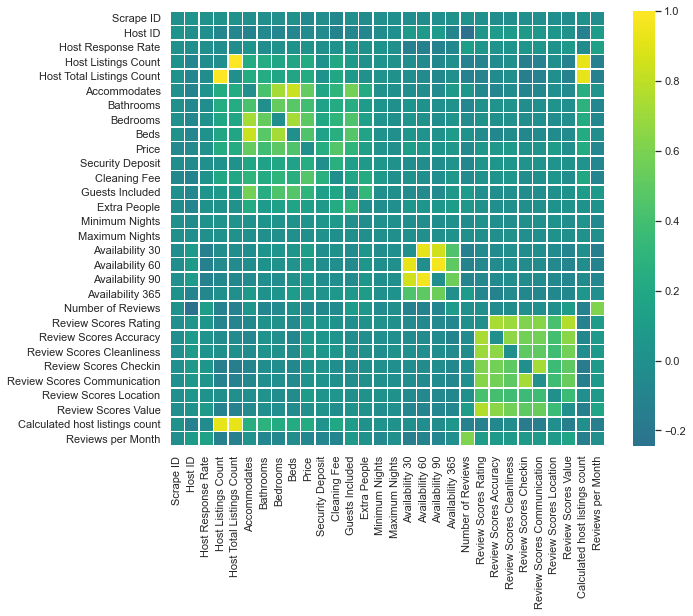

In [46]:
get_corr_matrix(dataset = df1[Var_continuas], metodo = 'pearson')

Hay 3 grupos de variables muy correladas, el primero hace referencia a las variables que describen el propio alojamiento y sus capacidades y políticas ('Accommodates', 'Beds', 'Security Deposit', etc..).
El segundo grupo hace referencia la disponibilidad del alojamiento en cantidades de días.
Y por último, el tercer grupo de variables muy correladas entre sí son las que hacen referencia a los 'Review Scores'

Se analiza la correlación de las variables con la variable objetivo 'Price':

In [47]:
df1_cor['Price']

Scrape ID                        -0.057423
Host ID                          -0.053114
Host Response Rate                0.004907
Host Listings Count               0.226505
Host Total Listings Count         0.226505
Accommodates                      0.520432
Bathrooms                         0.383238
Bedrooms                          0.495599
Beds                              0.440032
Price                             1.000000
Security Deposit                  0.238390
Cleaning Fee                      0.464952
Guests Included                   0.300520
Extra People                      0.123123
Minimum Nights                    0.027427
Maximum Nights                    0.001530
Availability 30                   0.109988
Availability 60                   0.068016
Availability 90                   0.035855
Availability 365                  0.061177
Number of Reviews                -0.058428
Review Scores Rating              0.059715
Review Scores Accuracy            0.069811
Review Scor

Las variables más correlacionadas con 'Price' son 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning Fee', 'Guest Included' 'Security Deposit' y las variables relacionadas con 'Host Listings Count', por lo que estas caractrísticas se estima que podrían tener un peso importante en los modelos.

También se puede observar que las variables 'Longitude' y 'Latitude' apenas están correlacionadas con el precio. Podría ser interesante eliminarlas del dataset ya que apenas aportarán información, además tenemos otras muchas variables que nos indican la ubicación del alojamiento como 'City, 'Smart Location', etc..

In [48]:
df1 = df1.drop(['Latitude','Longitude','Maximum Nights','Review Scores Value'], axis = 1)

In [49]:
Var_continuas=list(df1.select_dtypes(np.number).columns) #Lista variables continuas
Var_continuas

['Scrape ID',
 'Host ID',
 'Host Response Rate',
 'Host Listings Count',
 'Host Total Listings Count',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Availability 30',
 'Availability 60',
 'Availability 90',
 'Availability 365',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Calculated host listings count',
 'Reviews per Month']

Ahora vamos a ver las variables que tengan una correlación alta entre ellas, ya que podría ser útil para enriquecer el dataset quedarse con las variables que expliquen la mayor parte de la información de los datos, ya que si dos variables están muy correladas podríamos elegir solo 1 para explicar esa cantidad de información.

Se establece el umbral de correlación en 0.65.

In [50]:
corr = df1[Var_continuas].corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1)
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.65]

,level_0,level_1,correlation
115,Host Total Listings Count,Host Listings Count,1.000000
492,Availability 90,Availability 60,0.963501
731,Calculated host listings count,Host Listings Count,0.922842
732,Calculated host listings count,Host Total Listings Count,0.922842
463,Availability 60,Availability 30,0.921476
491,Availability 90,Availability 30,0.849756
229,Beds,Accommodates,0.837126
608,Review Scores Accuracy,Review Scores Rating,0.735448
231,Beds,Bedrooms,0.731142
695,Review Scores Communication,Review Scores Checkin,0.726319


Con la siguiente función se va a poder seleccionar estas variables que se han visto antes y tener en una lista las variables cuya información esta recogida en otras (por ejemplo no aparece la variable 'Accommodates' ya que es la que explica la información de 'Beds' o 'Bedrooms' que en cambio sí aparecen) por lo que se podrán eliminarlas después, basta con introducir las variables y un threshold, en este caso 0,65:

In [51]:
def correlation(x,threshold):
    correlated_cols=[]
    corr_matrix=x.corr('pearson')
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                correlated_cols.append(colname)
    return correlated_cols

In [52]:
correlation(df1[Var_continuas], 0.65)

['Host Total Listings Count',
 'Bedrooms',
 'Beds',
 'Beds',
 'Availability 60',
 'Availability 90',
 'Availability 90',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Cleanliness',
 'Review Scores Communication',
 'Calculated host listings count',
 'Calculated host listings count']

Para evitar considerar varias veces las variables que estén muy correladas con varias de las demás variables se usa la función set.

In [53]:
lista = set(correlation(df1[Var_continuas], 0.65))
variables_cor = list(lista)
variables_cor

['Review Scores Communication',
 'Availability 60',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Calculated host listings count',
 'Host Total Listings Count',
 'Bedrooms',
 'Availability 90',
 'Beds']

Ahora se procede a eliminar estas variables de nuestro dataset:

In [54]:
df1=df1.drop(columns=['Review Scores Communication','Beds','Calculated host listings count','Review Scores Accuracy',
                      'Host Total Listings Count','Availability 90','Availability 60','Bedrooms'], axis=1)
df1.shape

(14780, 42)

### LO DEL PCA NO ESTA CLARO

Se va a observar que variables están más correladas con la variable objetivo Price

Se va a realizar un análisis de componentes principales de las variables continuas para que la mayor cantidad de información quede recogida en menos dimensiones.
Primero se va a eliminar de este conjunto de variables la variable Price.

In [57]:
Var_continuas2 = list(df1.select_dtypes(np.number).columns)
Var_continuas2

['Scrape ID',
 'Host ID',
 'Host Response Rate',
 'Host Listings Count',
 'Accommodates',
 'Bathrooms',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Availability 30',
 'Availability 365',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Location',
 'Reviews per Month']

In [58]:
Var_continuas2.pop(8)
Var_continuas2

['Scrape ID',
 'Host ID',
 'Host Response Rate',
 'Host Listings Count',
 'Accommodates',
 'Bathrooms',
 'Price',
 'Security Deposit',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Availability 30',
 'Availability 365',
 'Number of Reviews',
 'Review Scores Rating',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Location',
 'Reviews per Month']

In [59]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [60]:
df1[Var_continuas2].describe()

,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Accommodates,Bathrooms,Price,Security Deposit,Guests Included,Extra People,Minimum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Location,Reviews per Month
count,1.478000e+04,1.478000e+04,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000
mean,2.017037e+13,3.608080e+07,95.488566,12.511502,3.277808,1.280683,73.540122,166.603721,1.589986,7.690460,3.050474,8.954736,202.104465,22.632273,92.212585,9.479635,9.707172,9.637889,1.726673
std,5.668377e+08,3.425360e+07,14.310050,34.087092,2.097291,0.657514,72.023341,77.379974,1.182550,12.971352,12.266517,9.333252,127.886822,38.290244,7.978675,0.915574,0.723806,0.708946,1.678401
min,2.016010e+13,1.745300e+04,0.000000,0.000000,1.000000,0.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,0.020000
25%,2.017040e+13,6.787360e+06,100.000000,1.000000,2.000000,1.000000,34.000000,150.000000,1.000000,0.000000,1.000000,0.000000,78.000000,1.000000,90.000000,9.000000,10.000000,9.000000,0.610000
50%,2.017040e+13,2.464875e+07,100.000000,2.000000,3.000000,1.000000,55.000000,150.000000,1.000000,0.000000,2.000000,6.000000,239.000000,7.000000,94.000000,10.000000,10.000000,10.000000,1.200000
75%,2.017040e+13,5.432919e+07,100.000000,6.000000,4.000000,1.000000,86.000000,150.000000,2.000000,15.000000,3.000000,14.000000,319.000000,27.000000,97.000000,10.000000,10.000000,10.000000,2.220000
max,2.017060e+13,1.247534e+08,100.000000,519.000000,16.000000,8.000000,999.000000,990.000000,16.000000,500.000000,1125.000000,30.000000,365.000000,446.000000,100.000000,10.000000,10.000000,10.000000,17.210000


El PCA identifica las direcciones con mayor varianza, por tanto será necesario estandarizar los datos ya que la escala de las variables es diferente, y entonces las variables con mayor escala dominarían al resto

In [61]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df1[Var_continuas2])
modelo_pca = pca_pipe.named_steps['pca']
modelo_pca.components_

array([[-7.52456318e-03, -1.35442282e-01, -5.32359932e-02,
         2.06188317e-01,  3.38740063e-01,  2.32287408e-01,
         2.29284626e-01,  9.84245321e-02,  2.48975246e-01,
         1.39248531e-01,  2.51840843e-02,  9.09521608e-02,
         1.37367627e-01, -3.21975897e-02, -4.23078716e-01,
        -3.85891132e-01, -4.03224646e-01, -2.91427331e-01,
        -1.40251548e-01],
       [-3.05544020e-02, -4.39713862e-02,  5.04288463e-02,
         1.37282892e-01,  3.87818378e-01,  3.24318151e-01,
         3.97095127e-01,  2.07145437e-01,  3.33024556e-01,
         1.96449448e-01,  2.14516887e-02, -7.57408576e-03,
         1.69782018e-02,  8.66510698e-03,  3.34773090e-01,
         3.30422482e-01,  2.69527068e-01,  2.72044324e-01,
         3.57845854e-02],
       [-4.41074531e-03, -1.66691199e-01,  2.28313430e-01,
        -1.49657955e-01,  1.15673587e-01, -9.66786510e-02,
        -9.18842342e-02, -8.13374053e-02,  2.04032335e-01,
         1.27491876e-01, -6.96024790e-02, -2.72787589e-01,
    

In [65]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df1[Var_continuas2].columns,
    index   = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
               'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19'])

,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Accommodates,Bathrooms,Price,Security Deposit,Guests Included,Extra People,Minimum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Location,Reviews per Month
PC1,-0.007525,-0.135442,-0.053236,0.206188,0.338740,0.232287,0.229285,0.098425,0.248975,0.139249,0.025184,0.090952,0.137368,-0.032198,-0.423079,-0.385891,-0.403225,-0.291427,-0.140252
PC2,-0.030554,-0.043971,0.050429,0.137283,0.387818,0.324318,0.397095,0.207145,0.333025,0.196449,0.021452,-0.007574,0.016978,0.008665,0.334773,0.330422,0.269527,0.272044,0.035785
PC3,-0.004411,-0.166691,0.228313,-0.149658,0.115674,-0.096679,-0.091884,-0.081337,0.204032,0.127492,-0.069602,-0.272788,-0.040197,0.617818,-0.053515,-0.096702,-0.057504,-0.043303,0.567478
PC4,0.041945,0.025739,0.165811,0.207274,0.052799,0.104400,0.008860,0.057117,-0.007883,-0.186813,0.086475,-0.618107,-0.657944,-0.174280,-0.050787,-0.056974,-0.070059,-0.000203,-0.107709
PC5,-0.225873,-0.735676,-0.017475,0.075358,-0.138526,-0.049885,-0.028842,0.220372,-0.181780,-0.049539,0.453577,-0.081100,0.107750,0.155851,0.073857,0.020842,0.033122,0.037594,-0.196462
PC6,-0.342547,0.076656,0.087856,-0.515491,-0.024537,-0.234582,-0.110611,0.290779,0.242601,0.505545,0.032006,-0.088351,-0.143855,-0.217088,-0.001161,-0.083238,0.060305,-0.110594,-0.192450
PC7,0.724859,0.130738,0.263640,-0.177982,0.021019,-0.037181,-0.061212,0.174407,0.074025,0.039576,0.539948,0.021165,0.122570,-0.034963,0.005294,-0.030415,0.031320,-0.050998,-0.022265
PC8,-0.473754,0.412240,0.194493,-0.089720,0.022290,0.088247,0.202014,0.270210,-0.135751,-0.388531,0.396260,0.138159,0.039972,0.046674,-0.069270,-0.049994,-0.048655,-0.041907,0.277378
PC9,0.160680,0.059830,-0.829718,-0.235716,0.016740,0.062514,0.010518,0.354264,0.023600,-0.118502,0.045626,-0.121978,-0.127411,0.141425,-0.024551,-0.058661,-0.012043,0.064604,0.143699
PC10,-0.183249,0.151674,-0.295948,0.135407,0.038381,-0.005662,-0.104927,-0.612047,0.185231,0.256735,0.569016,-0.009764,-0.081386,-0.029275,-0.003770,-0.008857,-0.005490,0.123581,0.058340


In [66]:
print(modelo_pca.explained_variance_ratio_)

[0.13857295 0.13369912 0.09680282 0.07635635 0.05750791 0.05506169
 0.05307855 0.05175072 0.04887625 0.04844869 0.04039085 0.03609021
 0.03457826 0.03034813 0.02549277 0.02499483 0.01793524 0.01536374
 0.01465091]


In [67]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
prop_varianza_acum

array([0.13857295, 0.27227206, 0.36907488, 0.44543123, 0.50293915,
       0.55800083, 0.61107939, 0.66283011, 0.71170636, 0.76015505,
       0.8005459 , 0.83663611, 0.87121438, 0.9015625 , 0.92705527,
       0.9520501 , 0.96998535, 0.98534909, 1.        ])

Text(0, 0.5, 'Por. varianza acumulada')

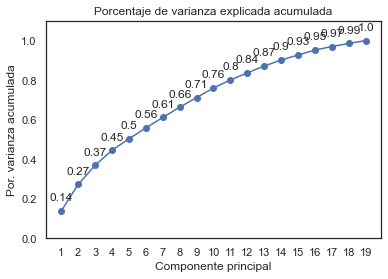

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df1[Var_continuas2].columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df1[Var_continuas2].columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

### TRANSFORMACIONES

In [33]:
from category_encoders import TargetEncoder
encoder=TargetEncoder()
df1[Var_discretas]= encoder.fit_transform(df1[Var_discretas], df1['Price'])

In [34]:
df_cord = df1[Var_discretas].corr(method='pearson')
df_cord

,Last Scraped,Experiences Offered,Host Name,Host Since,Host Location,Host Response Time,Host Verifications,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,...,Property Type,Room Type,Bed Type,Calendar Updated,Calendar last Scraped,First Review,Last Review,Cancellation Policy,Geolocation,Features
Last Scraped,1.000000e+00,2.513564e-02,3.317108e-01,2.908936e-01,5.302278e-01,7.540813e-02,6.436255e-02,6.086988e-01,5.497869e-01,5.859526e-01,...,2.253502e-01,8.773793e-02,1.491035e-02,7.088104e-02,9.889345e-01,1.283113e-01,1.924363e-01,1.657102e-01,7.981776e-13,4.137147e-01
Experiences Offered,2.513564e-02,1.000000e+00,-6.407609e-03,7.506132e-03,3.953601e-03,1.504822e-02,8.914121e-03,2.068962e-02,7.559844e-02,2.119122e-02,...,-5.040858e-03,9.319006e-03,3.833398e-03,2.369740e-03,2.864437e-02,3.532445e-02,2.362661e-02,2.044289e-02,5.095415e-12,8.428490e-02
Host Name,3.317108e-01,-6.407609e-03,1.000000e+00,5.850513e-01,3.046941e-01,7.896900e-02,1.789503e-01,3.981289e-01,3.070609e-01,2.596428e-01,...,1.360312e-01,2.954141e-01,2.419543e-02,1.961163e-01,3.313239e-01,1.761880e-01,1.593972e-01,1.813674e-01,3.536661e-14,2.933314e-01
Host Since,2.908936e-01,7.506132e-03,5.850513e-01,1.000000e+00,4.898555e-01,4.516587e-02,2.733563e-01,4.013794e-01,2.781862e-01,4.636442e-01,...,1.406708e-01,2.468956e-01,2.389414e-02,2.326851e-01,2.920899e-01,1.719540e-01,1.568461e-01,1.710226e-01,-1.704360e-15,2.828470e-01
Host Location,5.302278e-01,3.953601e-03,3.046941e-01,4.898555e-01,1.000000e+00,2.117157e-02,2.764968e-01,4.492067e-01,3.256487e-01,7.601882e-01,...,1.705107e-01,4.960280e-02,2.128497e-02,1.741655e-01,5.247323e-01,1.206922e-01,1.626678e-01,7.729845e-02,4.138934e-13,3.471707e-01
Host Response Time,7.540813e-02,1.504822e-02,7.896900e-02,4.516587e-02,2.117157e-02,1.000000e+00,-3.877291e-02,7.276896e-02,4.495446e-02,9.266729e-03,...,3.070691e-02,6.635743e-02,-4.104982e-03,-2.085204e-02,7.660848e-02,-4.163858e-02,-5.034706e-02,5.392978e-02,3.413544e-12,9.509562e-02
Host Verifications,6.436255e-02,8.914121e-03,1.789503e-01,2.733563e-01,2.764968e-01,-3.877291e-02,1.000000e+00,1.356915e-01,1.152161e-01,2.562651e-01,...,5.600523e-02,9.880326e-02,1.496827e-02,1.087655e-01,6.550878e-02,8.467604e-02,7.612907e-02,3.362436e-02,-2.167547e-13,1.656514e-01
Neighbourhood Cleansed,6.086988e-01,2.068962e-02,3.981289e-01,4.013794e-01,4.492067e-01,7.276896e-02,1.356915e-01,1.000000e+00,6.682343e-01,5.517371e-01,...,1.796324e-01,2.074109e-01,9.407994e-03,1.286957e-01,6.073428e-01,1.640704e-01,1.670297e-01,2.139691e-01,-2.122954e-13,3.427085e-01
Neighbourhood Group Cleansed,5.497869e-01,7.559844e-02,3.070609e-01,2.781862e-01,3.256487e-01,4.495446e-02,1.152161e-01,6.682343e-01,1.000000e+00,4.197902e-01,...,1.645053e-01,1.774667e-01,5.031997e-03,8.470528e-02,5.448181e-01,1.174695e-01,1.411315e-01,1.962757e-01,2.814171e-13,4.644082e-01
City,5.859526e-01,2.119122e-02,2.596428e-01,4.636442e-01,7.601882e-01,9.266729e-03,2.562651e-01,5.517371e-01,4.197902e-01,1.000000e+00,...,2.096546e-01,2.866132e-02,1.732300e-02,1.458459e-01,5.802839e-01,1.283950e-01,1.751045e-01,1.029131e-01,-4.957499e-13,3.637988e-01


In [35]:
corr2 = df1[Var_discretas].corr('pearson')
new_corr2 = corr2.abs()
new_corr2.loc[:,:] = np.tril(new_corr2, k=-1)
new_corr2 = new_corr2.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr2[new_corr2['correlation']>0.65]

,level_0,level_1,correlation
262,Smart Location,City,0.992753
391,Calendar last Scraped,Last Scraped,0.988935
237,Zipcode,Neighbourhood Cleansed,0.796490
257,Smart Location,Host Location,0.763409
211,City,Host Location,0.760188
191,Neighbourhood Group Cleansed,Neighbourhood Cleansed,0.668234
276,Country Code,Last Scraped,0.664608
403,Calendar last Scraped,Country Code,0.661463


In [36]:
correlation(df1[Var_discretas], 0.65)

['Neighbourhood Group Cleansed',
 'City',
 'Zipcode',
 'Smart Location',
 'Smart Location',
 'Country Code',
 'Calendar last Scraped',
 'Calendar last Scraped']

In [37]:
lista2 = set(correlation(df1[Var_discretas], 0.65))
variables_cord = list(lista2)
variables_cord

['Calendar last Scraped',
 'Neighbourhood Group Cleansed',
 'Zipcode',
 'Smart Location',
 'Country Code',
 'City']

Entre las correlaciones de Smart Location, City y Host Location nos indica que nos quedemos con la variable Host location para explicar la cantidad de información que expresan las 3 variables, sin embargo consideramos que para nuestro objetivo de predecir el precio de la casa nos interesa mucho más donde está ubicada la propia casa.
Por ello decidimos quedarnos con esta variable.
Acontinuación procedemos a eliminar estas variables de nuestra base de datos:

In [38]:
df1=df1.drop(columns=['City','Zipcode','Neighbourhood Group Cleansed','Host Location','Country Code',
                      'Calendar last Scraped'], axis=1)
df1.shape

(14780, 40)

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Scrape ID                  14780 non-null  int64  
 1   Last Scraped               14780 non-null  float64
 2   Experiences Offered        14780 non-null  float64
 3   Host ID                    14780 non-null  int64  
 4   Host Name                  14780 non-null  float64
 5   Host Since                 14780 non-null  float64
 6   Host Response Time         14780 non-null  float64
 7   Host Response Rate         14780 non-null  float64
 8   Host Listings Count        14780 non-null  float64
 9   Host Verifications         14780 non-null  float64
 10  Neighbourhood Cleansed     14780 non-null  float64
 11  Smart Location             14780 non-null  float64
 12  Latitude                   14780 non-null  float64
 13  Longitude                  14780 non-null  flo

## Desde aquí está limpio

# Creación, hiperparametrización y evaluación de modelos

### Dividir dataset

In [40]:
#Creación de train y test
from sklearn.model_selection import train_test_split
train , test = train_test_split(df1, test_size = 0.2)

x_train = train.drop('Price', axis=1)
y_train = train['Price']

x_test = test.drop('Price', axis = 1)
y_test = test['Price']

### Normalizar

In [41]:
# Normalización

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) # ya no hace falta porque creo que normalizan en el preprocessing

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.transform(x_test) # solo transform porque es test
x_test = pd.DataFrame(x_test_scaled)

In [42]:
#Error rate
#Paquetes importados
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

# Naive Regressor

Para tener la línea base más simple que se puede tener se va a crear un modelo que modele (válgase la redundancia) la variable de salida a partir de la media de los datos de entrenamiento. Este modelo equivaldría a un modelo lineal con tan solo un parámetro (el denominado en la diapositiva 3 de la presentación _III: Métodos de Regresión Lineal_ beta0)

In [43]:
y_train_pred_naive = np.repeat(np.mean(y_train), len(y_train))
y_test_pred_naive = np.repeat(np.mean(y_train), len(y_test))

In [44]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_naive)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_naive)),2))

El RMSE del modelo es
Para los datos de entrenamiento: 72.32
Para los datos de test: 70.82


# KNN REGRESSION

In [45]:
# Importar función GridSearch
from sklearn.model_selection import GridSearchCV

In [46]:
from sklearn.neighbors import KNeighborsRegressor

# Crear un diccionario con los parámetros que se quieren hiperparametrizar y los valores que se quieren probar
parameters = {'n_neighbors': [1,3,5,7,9]}
# Hiperparametrizar el modelo con GridSearch y como métrica el mean squared error
model = GridSearchCV(KNeighborsRegressor(), parameters, scoring = "neg_mean_squared_error")
# Ajustarlo a los datos de hiperparametrización
model.fit(x_train, y_train)
# Mostrar los mejores hiperparámetros
print("El número de vecinos que optimiza el RMSE es: n_neighbors =", model.best_params_["n_neighbors"])
# Crear un modelo con los mejores parámetros (hiperparametrizado)
model = KNeighborsRegressor(n_neighbors = model.best_params_["n_neighbors"])
# Entrenar el modelo con el dataset de entrenamiento
model.fit(x_train, y_train)

El número de vecinos que optimiza el RMSE es: n_neighbors = 5


KNeighborsRegressor()

In [47]:
y_train_pred_knn = model.predict(x_train)
y_test_pred_knn = model.predict(x_test)

In [48]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_knn)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_knn)),2))

El RMSE del modelo es
Para los datos de entrenamiento: 35.72
Para los datos de test: 48.27


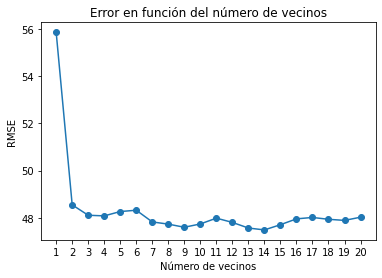

In [49]:
rmse_val = [] #Para guardar los valores de rmse para diferentes k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
#Graficar el valor RMSE y K valor
plt.plot(range(1,21), rmse_val)
plt.scatter(range(1,21), rmse_val)
plt.ylabel("RMSE")
plt.xticks(range(1,21))
plt.xlabel("Número de vecinos")
plt.title("Error en función del número de vecinos")
plt.show()

In [55]:
features_selected_knn = forward_selection(KNeighborsRegressor(n_neighbors=7), x_train, y_train, max_features=15)

# MultiLinear Regresión

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [52]:
y_train_pred_linear = model.predict(x_train)
y_test_pred_linear = model.predict(x_test)

In [53]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_linear)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_linear)),2))

El RMSE del modelo es
Para los datos de entrenamiento: 43.26
Para los datos de test: 44.55


In [54]:
def forward_selection(model, x_train, y_train, max_features = np.inf):
    scores = []
    columns_selected = []
    for column in x_train.columns:
        model = model
        model.fit(np.array(x_train[column]).reshape(-1,1), y_train)
        scores.append(sqrt(mean_squared_error(model.predict(np.array(x_train[column]).reshape(-1,1)), y_train)))
    columns_selected.append(np.argmin(scores))
    for n_columns in range(len(x_train.columns)-2):
        if len(columns_selected) >= max_features:
            break
        scores = []
        for column in x_train.columns[~x_train.columns.isin(columns_selected)]:
            model = model
            model.fit(x_train[columns_selected + [column]], y_train)
            scores.append(sqrt(mean_squared_error(model.predict(x_train[columns_selected + [column]]), y_train)))
        columns_selected.append(x_train.columns[~x_train.columns.isin(columns_selected)][np.argmin(scores)])
    return columns_selected

In [181]:
features_selected_linear = forward_selection(LinearRegression(), x_train, y_train)

In [182]:
def plot_forward_selection_performance(model, features_selected, x_train, y_train, x_test, y_test, features_names, figsize=(10,4)):
    columns_considered = list()
    scores = []
    for column_considered in features_selected:
        columns_considered.append(column_considered)
        model = model
        if len(columns_considered)>1:
            model.fit(x_train[columns_considered], y_train)
            scores.append(sqrt(mean_squared_error(model.predict(x_test[columns_considered]), y_test)))
        else:
            model.fit(np.array(x_train[columns_considered]).reshape(-1,1), y_train)
            scores.append(sqrt(mean_squared_error(model.predict(np.array(x_test[columns_considered]).reshape(-1,1)), y_test)))
    plt.figure(figsize = figsize)
    plt.plot(features_names[features_selected], scores)
    plt.ylabel("RMSE")
    plt.xlabel("Feature added")
    plt.xticks(rotation = 45, ha = "right", fontsize = 10)
    plt.show()

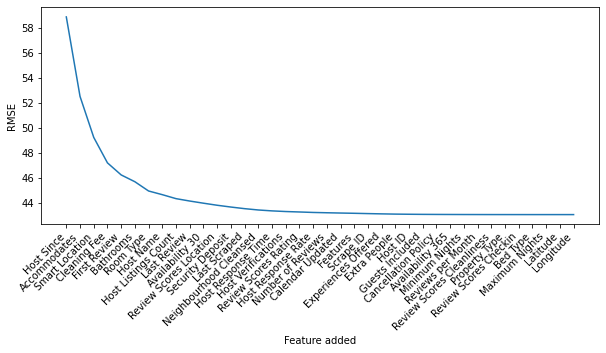

In [183]:
plot_forward_selection_performance(LinearRegression(), features_selected_linear, x_train, y_train, x_train, y_train, train.drop('Price', axis=1).columns)

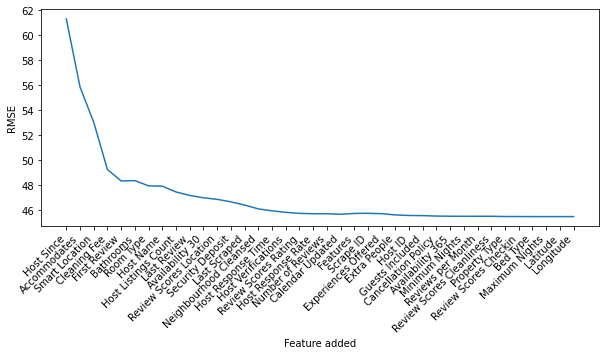

In [184]:
plot_forward_selection_performance(LinearRegression(), features_selected_linear, x_train, y_train, x_test, y_test, train.drop('Price', axis=1).columns)

## Decision Tree Regressor

In [163]:
from sklearn.tree import DecisionTreeRegressor
# Crear un diccionario con los parámetros que se quieren hiperparametrizar y los valores que se quieren probar
parameters = {'max_depth': [3,5,7,9]}
# Hiperparametrizar el modelo con GridSearch y como métrica el mean squared error
model = GridSearchCV(DecisionTreeRegressor(), parameters, scoring = "neg_mean_squared_error")
# Ajustarlo a los datos de hiperparametrización
model.fit(x_train, y_train)
# Mostrar los mejores hiperparámetros
print("El número de vecinos que optimiza el RMSE es: max_depth =", model.best_params_["max_depth"])
# Crear un modelo con los mejores parámetros (hiperparametrizado)
model = DecisionTreeRegressor(max_depth = model.best_params_["max_depth"])
# Entrenar el modelo con el dataset de entrenamiento
model.fit(x_train, y_train)

El número de vecinos que optimiza el RMSE es: max_depth = 5


DecisionTreeRegressor(max_depth=5)

In [164]:
y_train_pred_tree = model.predict(x_train)
y_test_pred_tree = model.predict(x_test)

In [165]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_tree)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_tree)),2))

El RMSE del modelo es
Para los datos de entrenamiento: 41.36
Para los datos de test: 48.91


# Random Forest Regression

In [186]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
 
# fit the regressor with x and y data
model.fit(x_train, y_train) 

RandomForestRegressor(random_state=42)

In [187]:
y_train_pred_rf = model.predict(x_train)
y_test_pred_rf = model.predict(x_test)

In [188]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_rf)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_rf)),2))

El RMSE del modelo es
Para los datos de entrenamiento: 13.76
Para los datos de test: 37.5


# XGboost Regression

In [114]:
from xgboost import XGBRFRegressor

In [169]:
 # create regressor object
model = XGBRFRegressor(n_estimators = 100, random_state = 42)
 
# fit the regressor with x and y data
model.fit(x_train, y_train) 

/Users/angela/miniconda3/envs/ml/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=42, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [170]:
y_train_pred_xgb = model.predict(x_train)
y_test_pred_xgb = model.predict(x_test)

In [171]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_xgb)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_xgb)),2))

El RMSE del modelo es
Para los datos de entrenamiento: 34.5
Para los datos de test: 44.64


# Neural Network

In [172]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()

In [173]:
model.fit(x_train, y_train) 

/Users/angela/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [174]:
y_train_pred_nn = model.predict(x_train)
y_test_pred_nn = model.predict(x_test)

In [175]:
print("El RMSE del modelo es")
print("Para los datos de entrenamiento:", round(sqrt(mean_squared_error(y_train, y_train_pred_nn)),2))
print("Para los datos de test:", round(sqrt(mean_squared_error(y_test, y_test_pred_nn)),2))

El RMSE del modelo es
Para los datos de entrenamiento: 41.77
Para los datos de test: 44.2


## Hasta aquí está limpio